In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
from astropy.io import fits
from matplotlib import colors
from astropy.wcs import WCS

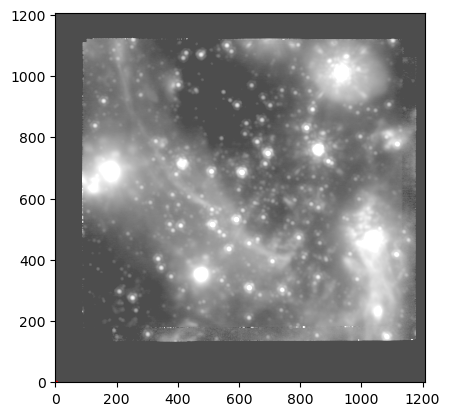

In [2]:
hdu_list = fits.open('/users/ava/Desktop/research/fits/mag20170726nirc2_lp.fits')
imgL = hdu_list[0].data
hdu_list[0].header

plt.imshow(imgL, cmap='gray', origin='lower', norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e4), zorder=-10, alpha=.7)#, clim(0, 2e3))
pts = np.array([[.492326, .76434], [.570969, .824112], [.60497, .769043]])
plt.scatter(pts[:, 0], pts[:, 1], marker="o", color="red", s=2)
plt.show()

In [3]:
from astropy.io import fits

# Open the FITS file
hdul = fits.open('/users/ava/Desktop/research/fits/mag20170726nirc2_lp.fits')

# Get the image data and dimensions
image_data = hdul[0].data  # Assuming the image is in the primary HDU
rows, columns = image_data.shape

# Calculate the number of pixels
num_pixels = rows * columns

# Close the FITS file
hdul.close()

# Print the result
print(rows)
print(columns)
print(f"The FITS image contains {num_pixels} pixels.")

1208
1208
The FITS image contains 1459264 pixels.


In [4]:
filename =  '/users/ava/Desktop/research/lis/m20170726nirc2_lp_1_0.6_stf_cal.lis'
with open(filename) as f:
    for line in f:
        print(line)

       irs16C   8.297984  2017.567   610.21698   683.95801       23.76       1.00        17   25353300.000

      irs16NW   8.573984  2017.567   695.29901   746.21899       23.76       1.00        17   19661200.000

      irs16CC   9.250984  2017.567   510.71500   687.28003       23.76       1.00        17   10544500.000

       star_1   5.455984  2017.567   936.30798  1008.01001       23.76       1.00        17  347371008.000

       star_2   5.818984  2017.567   477.50601   348.98499       23.76       1.00        17  248607008.000

       irs29N   6.560984  2017.567   860.01300   757.48499       23.76       1.00        17  125531000.000

       star_4   6.957984  2017.567  1031.95996   470.57599       23.76       0.97        18   87129904.000

      irs16NE   7.586984  2017.567   415.51801   710.96198       23.76       1.00        17   48779800.000

       star_6   5.245984  2017.567   181.99400   687.50702       23.76       1.00        17  421575008.000

    irs16SW-E   8.372984  20

5.0015902
7.078409800000001
5.8462999
6.2337001


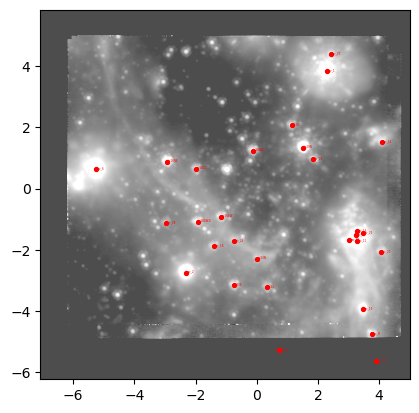

In [5]:
#Plotting stars in arcsecond relative to IRS16C

pixels_to_arcsec = 0.01 #I have found multiple numbers for this and not sure which is correct

pixels = 1208

x_offset = 0.97624 / 0.01
y_offset = 0.60588 / 0.01

x_pos = 610.21698 + x_offset
y_pos = 683.95801 - y_offset

right_arc = (pixels - x_pos)*0.01
left_arc = x_pos*0.01
up_arc = (pixels - y_pos)*0.01
down_arc = y_pos*0.01

print(right_arc)
print(left_arc)
print(up_arc)
print(down_arc)

starpos = np.loadtxt('/users/ava/Desktop/research/lis/m20170726nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, usecols=[3, 4])
starpos_arcsec = starpos * pixels_to_arcsec

plt.imshow(imgL, cmap='gray', origin='lower', extent=[-left_arc, right_arc, -down_arc, up_arc], norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e4), zorder=-10, alpha=0.7)

starname = np.loadtxt('/users/ava/Desktop/research/lis/m20170726nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, dtype=str, usecols=[0])
magnitudes = np.loadtxt('/users/ava/Desktop/research/lis/m20170726nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, usecols=[1])

for i in range(len(starname)):
    if magnitudes[i] <= 10:  # change magnitude threshold here 
        plt.scatter((starpos_arcsec[i, 0]-left_arc), (starpos_arcsec[i, 1]-down_arc), color='red', s=8)
        plt.annotate(starname[i], [starpos_arcsec[i, 0]-left_arc, starpos_arcsec[i, 1]-down_arc], color='red', size=2)

plt.show()